# Итераторы

Итераторы позволяют обойти все элементы итерируемых объектов и по всюду используются в `python`.

Итератор (`iterator`) --- это объект, который должен определить метод `__next__` (т.е. реагировать на функцию 

next https://docs.python.org/3/library/functions.html#next), 

выдавать следующий элемент коллекции по вызову этого метода и бросать исключение 

StopIteration https://docs.python.org/3/library/exceptions.html#StopIteration, 

когда эти элементы исчерпались.


## Стандартный итератор

Получить стандартный итератор по коллекции можно встроенной функцией [iter](https://docs.python.org/3/library/functions.html#iter).

In [39]:
a_list = list(range(1, 6, 2))
iterator = iter(a_list)
print(iterator)

In [ ]:
iterator = iter(range(3)) # вынимает __iter__

In [ ]:
# range(0, 3) -> [0, 1, 2]
next(iterator) # 1
next(iterator) # 3
next(iterator) # 5
# next(iterator) # ошибка StopIteration в next

5

В ячейке выше объявлен список `a_list = [0, 1, 2]`, а далее с помощью вызова функции [iter](https://docs.python.org/3/library/functions.html#iter) создан стандартный итератор `iterator` по нему. Теперь у этого итератора можно спросить следующий элемент списка функцией [next](https://docs.python.org/3/library/functions.html#next).

In [ ]:
a = next(iterator)
print(a)

0


Первый вызов функции `next` возвращает первый элемент контейнера, от которого создан контейнер.

In [ ]:
b = next(iterator)
print(b)

1


Второй вызов функции `next` --- второй элемент списка.

In [ ]:
c = next(iterator)
print(c)

2


Третий вызов --- третий элемент списка.

In [ ]:
d = next(iterator)
print(d)

StopIteration: 

Четвертый вызов функции `next` должен вернуть четвертый элемент, но т.к. список `a_list` содержит всего 3 элемента, то итератор уже исчерпан и возбуждается исключение `StopIteration`.

Вообще говоря, можно изменить список при итерации по нему, но желательно по возможности избегать этого.

In [ ]:
iterator = iter(a_list)
a = next(iterator)

a_list.insert(0, 42)
b, c, d = next(iterator), next(iterator), next(iterator)

print(a, b, c, d)
print(a_list)

0 0 1 2
[42, 0, 1, 2]


Цикл `for` использует итераторы для прохода по итерируемым объектам и сам вызывает функцию `next` до тех пор, пока не встретит исключение `StopIteration`.

Среди итерируемых объектов 
- все последовательности: списки, кортежи, строки, `range` и т.п.;
- множества, словари и все связанные с ними `view` (`dict_keys`, `dict_values` и `dict_items`);
- массивы `NumPy`;
- таблицы и столбцы `pandas`.  

## Нестандартные встроенные итераторы

В `python` существуют разные итераторы, которые могут пригодиться для разных целей, например, для того чтобы пробежаться по коллекции в другом порядке.

### `reversed`

Встроенная функция [reversed](https://docs.python.org/3/library/functions.html#reversed) создаёт итератор, который пробегает по коллекции в обратном порядке относительно стандартного итератора `iter`.

In [ ]:
x = [1, 2, 3]
reversed_iterator = reversed(x)
print(reversed_iterator)
print(list(reversed_iterator))

[3, 2, 1]


### `enumerate`

Встроенная функция [enumerate](https://docs.python.org/3/library/functions.html#enumerate) возвращает "нумерующий итератор", т.е. итератор, который помимо следующего элемента контейнера возвращает ещё и его номер.

In [ ]:
L = list("abc")
enumerated_iterator = enumerate(L)

print(L)
print(enumerated_iterator)
print(list(enumerated_iterator))

['a', 'b', 'c']
[(0, 'a'), (1, 'b'), (2, 'c')]


Часто используется в циклах, если нужен доступ к элементам контейнера по индексу. При этом, следующая запись
```python
for i, _ in enumerate(iterable):
    ...
```
считается предпочтительнее, чем
```python
for i in range(len(iterable)):
    ...
```

In [ ]:
for i, x in enumerate(L):
    print(i, x)

0 a
1 b
2 c


Конечно, эти итераторы можно комбинировать.

In [ ]:
for i, x in enumerate(reversed(L)):
    print(i, x)

0 c
1 b
2 a


### `zip`

Встроенная функция [zip](https://docs.python.org/3/library/functions.html#zip) создаёт итератор по нескольким итерируемым объектам, т.е. позволяет пробежаться по нескольким контейнерам одновременно.

В случае двух контейнеров название функции `zip` хорошо иллюстрирует принцип её действия.

```{figure} /_static/lecture_specific/iterators/zip.svg
```

In [ ]:
X = "ABC"
Y = [1, 2, 3, 4]

zip_XY = zip(X, Y)
print(zip_XY)
print(list(zip_XY))

[('A', 1), ('B', 2), ('C', 3)]


В ячейке выше приведен пример с двумя коллекциями `X` и `Y`. В общем случае можно передавать произвольное количество коллекций в функцию `zip`. Типичное её применение в цикле выглядит следующем образом.

```python
for x1, x2, ..., xn in zip(X1, X2, ..., Xn):
    ...
```

In [ ]:
for i, x, y in zip(range(len(X)), X, Y):
    print(f"{i}: {x=}, {y=}")

0: x='A', y=1
1: x='B', y=2
2: x='C', y=3


Предыдущий цикл можно заменить конструкцией вида.

In [ ]:
for i, (x, y) in enumerate(zip(X, Y)):
    print(f"{i}: {x=}, {y=}")

0: x='A', y=1
1: x='B', y=2
2: x='C', y=3


Функция `zip` может быть использована для того, чтобы пробежаться по столбцам матрицы, т.е. как бы транспонировать её.

In [ ]:
m = [
    [11, 12, 13],
    [21, 22, 23],
]

for row in m:
    print(row)

print()

for column in zip(*m):
    print(column)


[11, 12, 13]
[21, 22, 23]

(11, 21)
(12, 22)
(13, 23)


Если коллекции внутри `zip` содержат разное количество элементов, то итерация прекратится, как только закончится элементы в самом коротком из них, а функция [zip_longest](https://docs.python.org/3/library/itertools.html#itertools.zip_longest) из модуля стандартной библиотеки [itertools](https://docs.python.org/3/library/itertools.html#module-itertools) позволяет итерировать до упора, пока хотя бы в одной последовательности остались элементы.

## Модуль `itertools`

В модуле [itertools](https://docs.python.org/3/library/itertools.html#module-itertools) определен ещё ряд полезных итераторов.

Рассмотрим его подробнее в блоке Функциональное программирование



# Генераторы

## Выражение `yield`

Если тело функции содержит хотя бы одно ключевое слово [yield](https://docs.python.org/3/reference/simple_stmts.html#yield), то это так называемая [функция-генератор](https://docs.python.org/3/glossary.html#term-generator). Вызов функции генератора не приводит к исполнению тела функции. Вместо этого функция-генератор возвращает [объект генератора](https://docs.python.org/3/glossary.html#term-generator-iterator).

In [41]:
def generator_function():
    print("Начало функции.")
    yield 0

print(type(generator_function))

generator_object = generator_function()
print(type(generator_object))

<class 'function'>
<class 'generator'>


In [42]:
obj_a = [number for number in range(20)] # list comprehension
type(obj_a)

list

In [43]:
obj_b = (number for number in range(20)) # list comprehension с круглыми скобками == генератор
type(obj_b)

generator

In [44]:
def get_obj_b():
    for number in range(20):
        yield number
        
type(get_obj_b())

generator

In [45]:
obj_b

<generator object <genexpr> at 0x7c89280d68c0>

In [46]:
for test in obj_b:
    # перемещение по генератору
    print(test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [50]:
from inspect import getgeneratorstate

getgeneratorstate(obj_b)

'GEN_CLOSED'

In [49]:
for test in obj_a:
    # перемещение по генератору
    print(test)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [57]:
iter_a = iter(obj_a)


In [60]:
next(iter_a)

2

Объект генератора хранит в себе исходный код функции генератора, её пространство локальных переменных, а так же текущую точку выполнения. В этом и  заключается главная разница между функцией и генератором.

Функция не хранит своё состояние между своими вызовами, ключевое слово `return` возвращает управление вызывающему коду. Ключевое слово (выражение) `yield` в свою очередь, передаёт управление вызывающему коду, но запоминает место и состояние (значение локальных переменных и т.п.), а не сбрасывает его. Это позволяет в последствии возобновить исполнение кода в генераторе.

Применение функции `next` к объекту генератора возобновляет (или начинает) исполнение кода в генерации до тех пор, пока не встретится выражение `yield`. Значение справа от `yield` возвращается функцией `next` вызывающему коду. Исполнение кода в генераторе ставится на паузу до следующего вызова функции `next`.

```{note}
Вообще говоря, у объекта генератора есть метод `send`, который позволяет не только получать объекты из генератора, но и передавать объекты из вызывающего кода в код генератора. Вызов этого метода тоже возобновляет исполнение генератора. Если `g` --- объект генератора, то выражение `g.send(None)` в точности эквивалентно выражению `next(g)`.
```

Продемонстрируем особенность объекта генератора на примере. Для этого напишем функцию-генератор обратного отсчета с 2.

In [65]:
def countdown_from_2():
    print(f"Начинаю обратный отсчет с двух.")
    yield 2
    print("Продолжаю обратный отсчет. Следующее значение 1.")
    yield 1
    print("Обратный отсчет закончен.")
    return

g = countdown_from_2()

Выше объявлена функция-генератор `countdown_from_2`. И далее результата вызова этой функции связывается с именем `g`. Заметьте, что на экране не появилось сообщений, потому что на этот момент исполнение инструкций в тела функций ещё не началось:  был создан только объект генератора.

Применим функцию `next` к объекту генератора.

In [66]:
print(f"Функция next вернула значение {next(g)}.")

Начинаю обратный отсчет с двух.
Функция next вернула значение 2.


Теперь мы видим, что инструкции в теле цикла начали исполняться, но не до конца, а только до инструкции `yield 2`.
```python
def countdown_from_2():
    print(f"Начинаю обратный отсчет с двух.")
    yield 2 # <--- pause
    print("Продолжаю обратный отсчет. Следующее значение 1.")
    yield 1
    print("Обратный отсчет закончен.")
    return
```

Применим функцию `next` ещё раз.

In [ ]:
print(f"Функция next вернула значение {next(g)}.")

Продолжаю обратный отсчет. Следующее значение 1.
Функция next вернула значение 1.


Инструкции продолжились исполняться, пока не встретился очередной `yield`.

```python
def countdown_from_2():
    print(f"Начинаю обратный отсчет с двух.")
    yield 2
    print("Продолжаю обратный отсчет. Следующее значение 1.")
    yield 1 # <--- pause
    print("Обратный отсчет закончен.")
    return
```

Последний раз применим функцию `next`. Заметим, что дальше по пути исполнения программы встречается ключевое слово `return`, а не `yield`.

```python
def countdown_from_2():
    print(f"Начинаю обратный отсчет с двух.")
    yield 2
    print("Продолжаю обратный отсчет. Следующее значение 1.")
    yield 1
    print("Обратный отсчет закончен.")
    return # <--- raise StopIteration
```

Ключевое слово `return` в генераторе возбуждает исключение `StopIteration`, что приводит к выходу из тела функции генератора.

In [ ]:
try:
    next(g)
except StopIteration:
    print("Генератор исчерпан.")

Обратный отсчет закончен.
Генератор исчерпан.


## Итераторы vs генераторы

Функции генераторы удобно задействовать для создания итераторов, т.к. они поддерживают тот же интерфейс: по запросу функции `next` выдаётся очередное значение, по исчерпании элементов возбуждается исключение `StopIteration`.

В качестве примера рассмотрим наивную реализацию альтернативы `range`, но для действительных чисел.

In [70]:
def frange(start, stop, step=1.0):
    while start < stop:
        yield start
        start += step

for x in frange(0, 1, 0.1):
    print(x)

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


Ключевое отличие генератора от классического итератора заключается в том, что итератор выдаёт уже существующие в каком-то контейнере значения, а генератор вычисляет новые значения на лету. Это позволяет экономить ресурсы системы, если для дальнейших вычислений не требуются, чтобы все значения где-то хранились в одном месте.

В качестве примера рассмотрим вычисление числа $\pi$ через сумму ряда

$$
\sum_{n=1}^\infty \dfrac{1}{n^2} = \dfrac{\pi^2}{6}.
$$

In [77]:
from math import sqrt # корень квадратный

def list_of_terms(N):
    return [1./(n * n) for n in range(1, N)]


def generator_of_terms(N):
    for n in range(1, N):
        yield 1/(n * n)


def pi_from_sum(S):
    return sqrt(6*S)


N = 1_000_000
S1 = sum(list_of_terms(N))
S2 = sum(generator_of_terms(N))

print(pi_from_sum(S1), pi_from_sum(S2))

3.141591698659512 3.141591698659512


In [79]:
S1

1.6449330668477264

In [80]:
S2

1.6449330668477264

In [81]:
import sys

print(sys.getsizeof(list_of_terms(N)))
print(sys.getsizeof(generator_of_terms(N)))

8448728
208


In [82]:
def get_names():
    print('Start')
    print('Continue')
    yield 'Тинки-Винки'
    print('Continue - 2')
    yield 'Дипси'
    print('Continue - 3')
    return 'Новый телепузик' # завершаем генератор
    print('Continue - 4')
    yield 'Ляля'
    print('Continue - 5')
    yield 'По'

gen = get_names()

In [83]:
while True:
    try:
        print('Значение, полученное генератором', next(gen))
    except StopIteration as e:
        print('Возвращаемое значение', e.value)
        break

Start
Continue
Значение, полученное генератором Тинки-Винки
Continue - 2
Значение, полученное генератором Дипси
Continue - 3
Возвращаемое значение Новый телепузик


Профилирование по памяти продемонстрирует, что функция с генератором гораздо экономнее при больших `N`, чем функция со списком. Это объясняется тем, что ни в один момент времени не создаётся список, чтобы хранить члены ряда. Вместо этого, они вычисляются по запросу функции `sum`. Такой подход, когда вычисления откладываются до тех пор, пока не потребуется их результат, называют [ленивыми вычислениями](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BD%D0%B8%D0%B2%D1%8B%D0%B5_%D0%B2%D1%8B%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F).

Т.к. генератор поддерживает протокол итерации, то при необходимости можно получить список из генератора.  

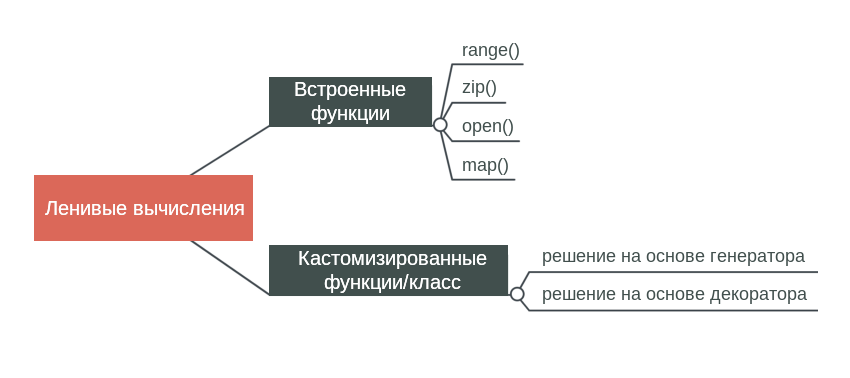

In [ ]:
print(list(frange(0, 1, 0.1)))

[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]


Но это может привести к зацикливанию, если генератор никогда не исчерпается. В этом заключается ещё одно крупное отличие генераторов от итераторов: генераторы могут генерировать бесконечную последовательность элементов, а итераторы всегда пробегаются по расположенной в памяти, а значит конечной, последовательности элементов. Например, следующий генератор выдаёт бесконечную последовательность натуральных чисел.

```{note}
В модуле [itertools](https://docs.python.org/3/library/itertools.html) реализован генератор [count](https://docs.python.org/3/library/itertools.html#itertools.count), с помощью которого можно добиться точно такого же поведения.
```

In [ ]:
def count():
    x = 1
    while True:
        yield x
        x += 1

Т.к. такой генератор никогда не исчерпается, то он никогда и не бросит исключения `StopIteration`, а значит применять его в цикле `for` можно только в случае, если предусмотрен выход оператором `break`. Иначе программа зациклится.

## Генераторные выражения

Если вместо квадратных скобочек в списковом включении указать круглые, то вы получите [генераторное выражение](https://docs.python.org/3/glossary.html#term-generator-expression). Разница заключается в том, что в случае спискового включения все вычисления производятся сразу и в результате выходит список, а в случае генераторного выражения вы получаете объект генератора, что само по себе не приводит к никаким вычислениям.

Чтобы продемонстрировать это, создадим список и генератор схожим выражением и измерим, сколько байт занимает каждый из них.

```{note}
Метод [getsizeof](https://docs.python.org/3/library/sys.html#sys.getsizeof) измеряет количество байт, которое занимает объект в памяти. Он корректно работает для всех встроенных объектов и объектов из стандартной библиотеки, но может давать ложную информацию для пользовательских объектов и объектов из сторонних библиотек.
```

In [ ]:
from sys import getsizeof

l = [x * x for x in range(1_000_000)]
g = (x * x for x in range(1_000_000))

print(f"Список занимает {getsizeof(l)} байт")
print(f"Генератор занимает {getsizeof(g)} байт")

print(sum(l), sum(g))

Список занимает 8448728 байт
Генератор занимает 104 байт
333332833333500000 333332833333500000
